In [37]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [38]:
means = [[2,2], [8,3], [3,6],[7,9]]
cov = [[1,0], [0,1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X3 = np.random.multivariate_normal(means[3], cov, N)

X = np.concatenate((X0, X1, X2, X3), axis = 0)
#Tao cac ma tran label

K = 4
original_label = np.asarray([0] * N + [1] * N + [2] * N + N * [3]).T


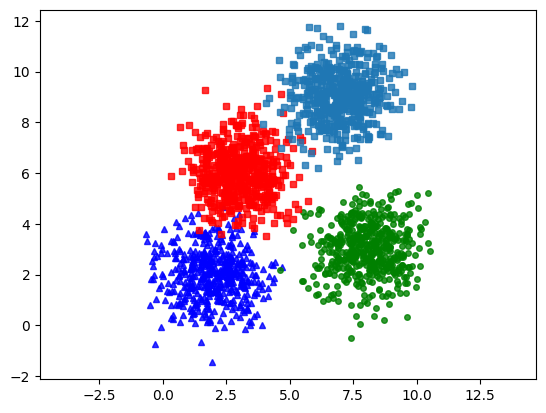

In [39]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    X3 = X[label == 3, :]

    plt.plot(X0[:, 0], X0[:, 1], '^b', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
    plt.plot(X3[:, 0], X3[:, 1], 's', markersize = 4, alpha = .8)


    plt.axis('equal')
    plt.plot()
    plt.show()
kmeans_display(X,original_label)

In [40]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [41]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers found by our algorithm:
[[6.96118307 9.04573259]
 [8.03643517 3.02468432]
 [1.9780868  2.0065323 ]
 [2.97393994 6.01971734]]


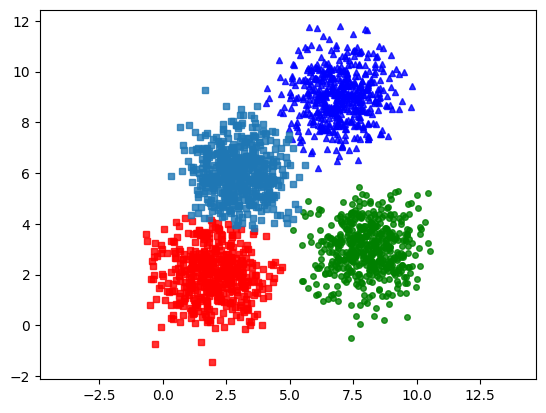

In [42]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])

Change a little bit in the input data


In [43]:
means = [[2,2], [8,3], [3,6]]
cov = [[6,2], [7,2]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
#Tao cac ma tran label

K = 3
original_label = np.asarray([0] * N + [1] * N + [2] * N).T

C:\Users\Admin\AppData\Local\Temp\ipykernel_26452\3915930923.py:4: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X0 = np.random.multivariate_normal(means[0], cov, N)
C:\Users\Admin\AppData\Local\Temp\ipykernel_26452\3915930923.py:5: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X1 = np.random.multivariate_normal(means[1], cov, N)
C:\Users\Admin\AppData\Local\Temp\ipykernel_26452\3915930923.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X2 = np.random.multivariate_normal(means[2], cov, N)


In [44]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [45]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers found by our algorithm:
[[4.32072446 4.3780111 ]
 [0.05575403 2.45973368]
 [9.51685665 3.90086074]]


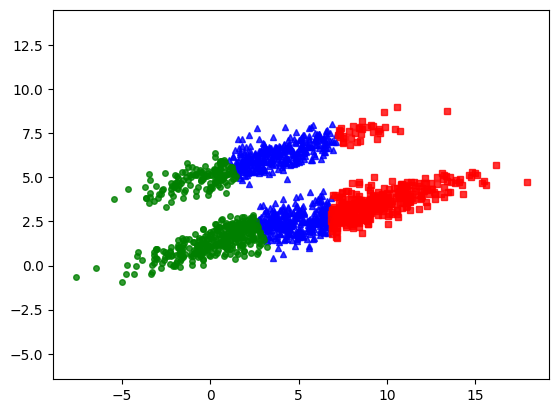

In [46]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])

As we can see the algorithm still find 